In [2]:
# --- 🔧 Setup and Imports ---
import hopsworks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 🔑 Connect to Hopsworks ---
project = hopsworks.login(api_key_value="n5hGwARKFatp9aKl.BxHt0Ymf1IZFSW87cmtIJbUqnvjyVO0a713g2RwvPvUfh04frFh7CYyWfwhAtqmV")  # Replace with your actual key or use .env
fs = project.get_feature_store()
print("✅ Connected to Hopsworks project:", project.name)



2025-10-11 02:24:00,277 INFO: Initializing external client
2025-10-11 02:24:00,278 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-10-11 02:24:02,853 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1251493
✅ Connected to Hopsworks project: aqiforecast


In [3]:
# Try to load from Feature View first
try:
    feature_view = fs.get_feature_view(name="aqi_feature_view", version=1)
    if feature_view is not None:
        df = feature_view.get_batch_data()
        print("✅ Loaded data from Feature View")
    else:
        raise ValueError("Feature View not found.")
except Exception as e:
    print(f"⚠️ Could not load feature view: {e}")
    print("🔄 Trying to read Feature Group instead...")
    feature_group = fs.get_feature_group(name="aqi_features", version=1)
    df = feature_group.read()
    print("✅ Loaded data from Feature Group")

⚠️ Could not load feature view: Feature View not found.
🔄 Trying to read Feature Group instead...
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.14s) 
✅ Loaded data from Feature Group


In [4]:
print("Dataset shape:", df.shape)
display(df.head())


Dataset shape: (133, 16)


,timestamp_utc,ow_temp,ow_pressure,ow_humidity,ow_wind_speed,ow_wind_deg,ow_clouds,ow_co,ow_no2,ow_pm2_5,ow_pm10,aqi_aqicn,hour,day,month,weekday
0,2025-10-10 18:17:18.615195+00:00,26.46,1012,69,3.76,256,0,7.60,7.40,196,147,196,18,10,10,4
1,2025-10-10 18:47:11.519266+00:00,26.34,1012,69,4.08,264,0,7.70,7.50,206,157,206,18,10,10,4
2,2025-10-02 15:24:25+00:00,31.03,1005,63,6.49,126,88,116.06,1.64,5,11,55,15,2,10,3
3,2025-10-02 08:30:02+00:00,33.85,1002,48,7.55,65,6,140.02,1.21,16,25,91,8,2,10,3
4,2025-10-06 03:00:00+00:00,27.12,1006,82,6.54,250,3,0.00,0.00,0,0,0,3,6,10,0


In [8]:

import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()

fg = fs.get_feature_group(name="aqi_features", version=1)
df = fg.read()

print("✅ Hopsworks feature data shape:", df.shape)



2025-10-11 00:26:41,324 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-10-11 00:26:41,341 INFO: Initializing external client
2025-10-11 00:26:41,343 INFO: Base URL: https://c.app.hopsworks.ai:443


2025-10-11 00:26:43,278 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1251493
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.53s) 
✅ Hopsworks feature data shape: (130, 16)


Rows with AQI: 27


,ow_temp,ow_pressure,ow_humidity,ow_wind_speed,ow_wind_deg,ow_clouds,ow_co,ow_no,ow_no2,ow_o3,...,aqicn_co,aqicn_no2,aqicn_pm25,aqicn_pm10,aqicn_o3,aqicn_so2,hour,day,month,weekday
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0,27.0,27.0
mean,32.032593,1003.555556,57.296296,7.002593,100.444444,56.407407,120.422593,0.041481,1.501481,67.772593,...,4.288889,7.362963,90.037037,43.851852,9.485185,0.500000,13.148148,2.0,10.0,3.0
std,1.949068,1.476309,10.487409,0.836791,21.333133,31.746907,5.958012,0.053687,0.339419,6.909337,...,0.879831,0.577893,26.293435,14.040337,4.865238,0.067937,2.713268,0.0,0.0,0.0
min,29.640000,1002.000000,46.000000,5.660000,65.000000,6.000000,114.570000,0.000000,1.050000,59.260000,...,2.600000,6.500000,51.000000,20.000000,3.600000,0.400000,8.000000,2.0,10.0,3.0
25%,29.980000,1002.000000,46.500000,6.490000,81.000000,22.000000,117.250000,0.000000,1.210000,61.250000,...,3.800000,6.900000,63.000000,28.500000,4.700000,0.500000,11.000000,2.0,10.0,3.0
50%,31.800000,1004.000000,57.000000,6.930000,101.000000,77.000000,118.080000,0.000000,1.570000,65.340000,...,4.200000,7.400000,82.000000,43.000000,6.900000,0.500000,14.000000,2.0,10.0,3.0
75%,34.030000,1005.000000,68.000000,7.820000,125.000000,82.500000,123.240000,0.080000,1.835000,74.535000,...,5.000000,7.600000,116.500000,58.000000,14.250000,0.500000,15.500000,2.0,10.0,3.0
max,34.270000,1005.000000,71.000000,7.950000,126.000000,96.000000,140.020000,0.180000,1.890000,77.540000,...,5.700000,8.700000,128.000000,61.000000,15.800000,0.600000,17.000000,2.0,10.0,3.0


In [11]:
# Convert timestamp to datetime
df['timestamp_utc'] = pd.to_datetime(df['timestamp_utc'])

# Sort by timestamp
df = df.sort_values('timestamp_utc')

In [12]:
# Select numeric columns only for analysis
numeric_cols = df_ffill.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_ffill[numeric_cols]

# Now you can do numeric operations safely
print(df_numeric.describe())

         ow_temp  ow_pressure  ow_humidity  ow_wind_speed  ow_wind_deg  \
count  70.000000    70.000000    70.000000      70.000000    70.000000   
mean   30.156571  1004.728571    61.614286       6.096571   131.957143   
std     2.468585     1.801138    14.216028       1.819602    69.701940   
min    25.720000  1002.000000    35.000000       0.290000    27.000000   
25%    28.485000  1003.000000    47.000000       5.465000    81.000000   
50%    29.790000  1005.000000    63.000000       6.510000   107.500000   
75%    31.965000  1006.000000    71.750000       7.425000   185.500000   
max    34.270000  1008.000000    86.000000       9.040000   341.000000   

        ow_clouds       ow_co      ow_no     ow_no2      ow_o3  ...  \
count   70.000000   70.000000  70.000000  70.000000  70.000000  ...   
mean    52.542857  131.679714   0.121571   1.326286  72.596571  ...   
std     38.386926   10.476790   0.076455   0.256883   5.890568  ...   
min      0.000000  114.570000   0.000000   1.0500

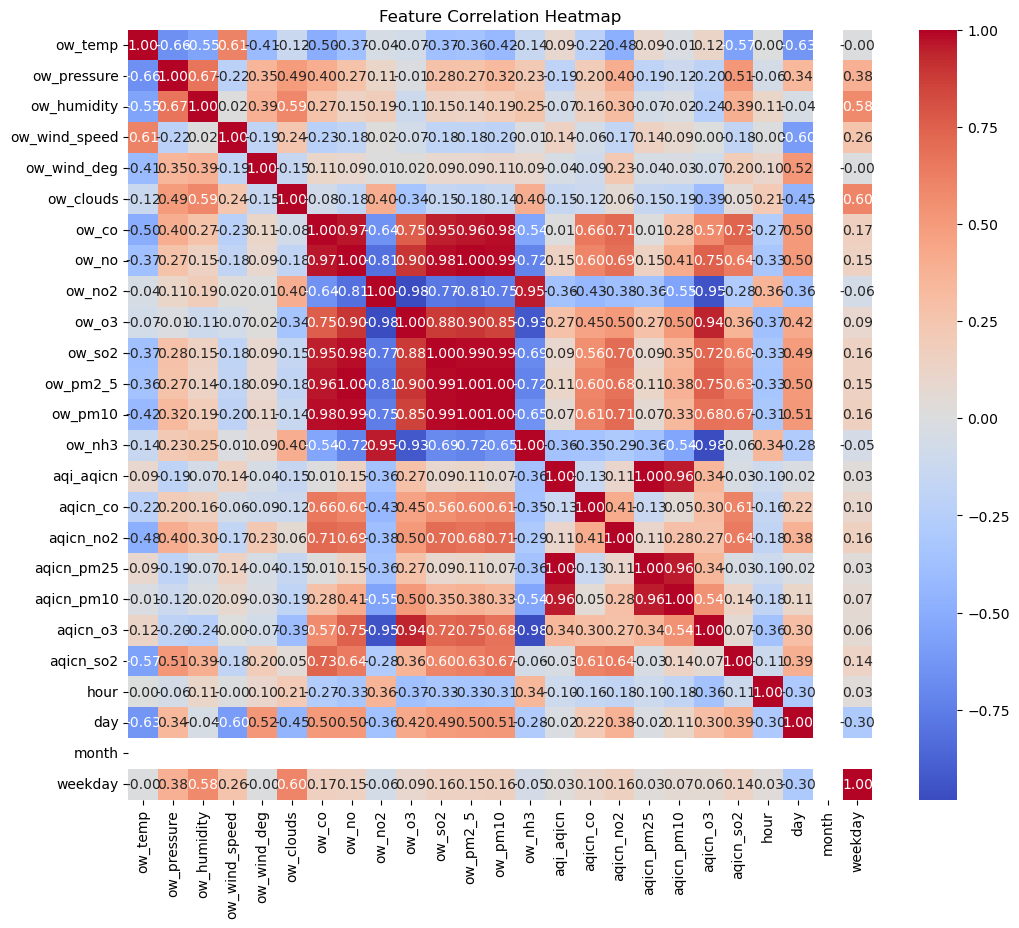

In [14]:
# Plot correlation heatmap
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

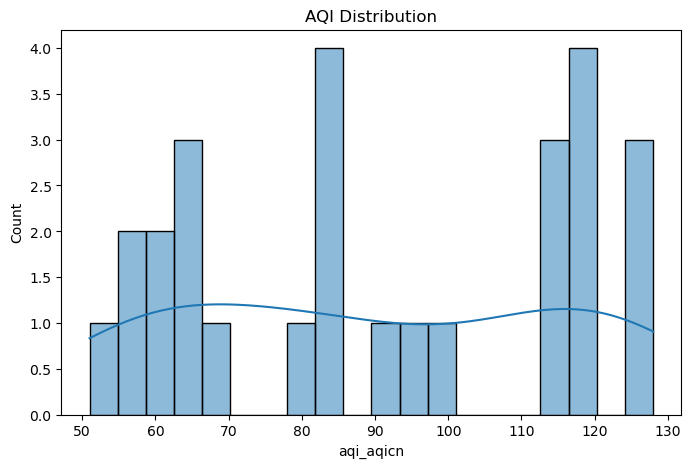

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df_aqi['aqi_aqicn'], bins=20, kde=True)
plt.title("AQI Distribution")
plt.show()

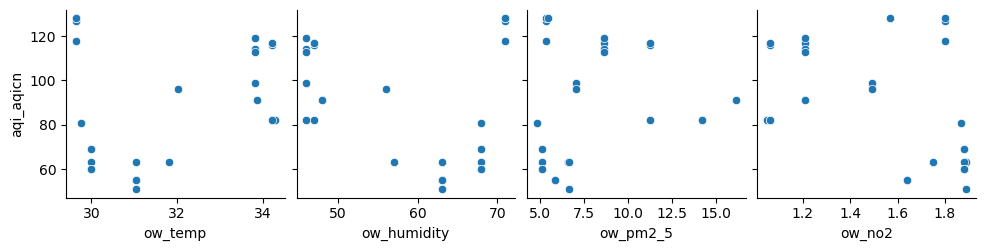

In [16]:
key_features = ['ow_temp', 'ow_humidity', 'ow_pm2_5', 'ow_no2']
sns.pairplot(df_aqi, x_vars=key_features, y_vars='aqi_aqicn', kind='scatter')
plt.show()


NameError: name 'model' is not defined